# Predicting values on Boston dataset

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

###  

In [7]:
import pandas as pd

In [17]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [24]:
X = df
y = data.target

In [25]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<AxesSubplot:>

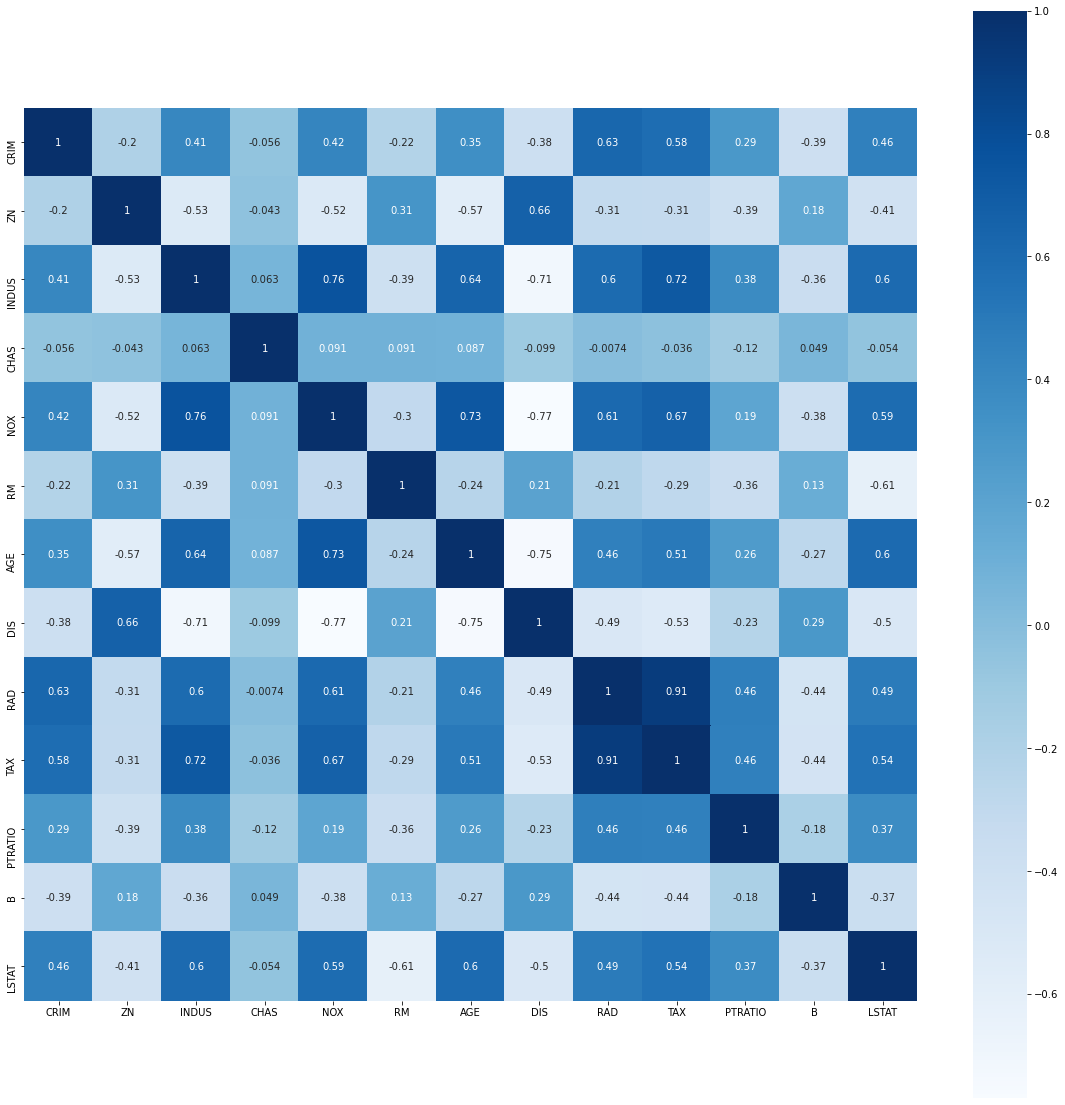

In [36]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), cmap='Blues', square= True, annot= True)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
model = LinearRegression()

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size= 0.4)

In [45]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [59]:
model.score(Xtest, ytest)

0.736310817032935

###  

### Prediction

In [61]:
prediction = model.predict(Xtest)

In [62]:
testData = Xtest.copy().drop([*Xtest.columns], axis=1)
testData['Real'] = ytest
testData.reset_index(inplace= True)
testData['Predict'] = prediction

<AxesSubplot:xlabel='index', ylabel='Real'>

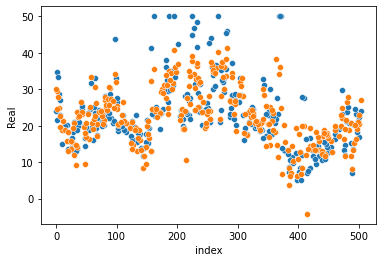

In [69]:
sns.scatterplot(x= 'index', y= 'Real', data= testData)
sns.scatterplot(x= 'index', y= 'Predict', data= testData)

### Other way

<AxesSubplot:>

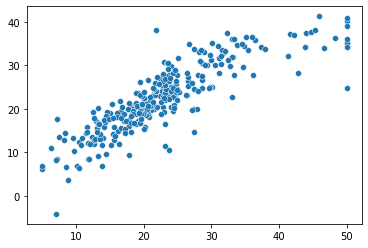

In [72]:
sns.scatterplot(x= ytest, y= prediction)

### Another way

<AxesSubplot:ylabel='Count'>

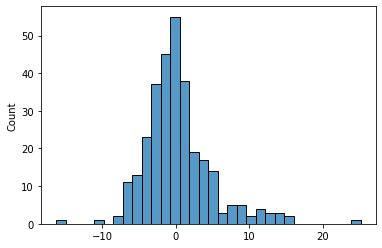

In [73]:
sns.histplot((ytest - prediction))

### That's it!
Let's go for the so called `Project`